In [1]:
import matplotlib.pyplot as plt
import numpy as np
from deep_unfolding import (
    gen_linear, SOR, SORCheby, AOR, Richardson, SORNet, SORChebyNet, AORNet, RichardsonNet
)

In [2]:
# Model parameters and Parameters for evaluation of generalization error
total_itr = 25  # Total number of iterations
n = 150  # Size of matrix (rows)
m = 450  # Size of matrix (columns)
bs = 10  # Number of samples
seed = 12

# Generate A and H
A, H, W, solution, y = gen_linear(n, m, seed, bs)

In [3]:
ri_model = Richardson(H, bs, y)
sor_model = SOR(H, bs, y, omega=1.8)
sorcheb_model = SORCheby(H, bs, y, omega=1.8, omegaa=1.8, gamma=0.8)
aor_model = AOR(H, bs, y, omega=0.3, r=0.2)

In [4]:
ri_model.solve(total_itr)
sor_model.solve(total_itr)
sorcheb_model.solve(total_itr)
aor_model.solve(total_itr)

pass

In [5]:
ri_norm = ri_model.evaluate_all(solution)
sor_norm = sor_model.evaluate_all(solution)
sorcheb_norm = sorcheb_model.evaluate_all(solution)
aor_norm = aor_model.evaluate_all(solution)

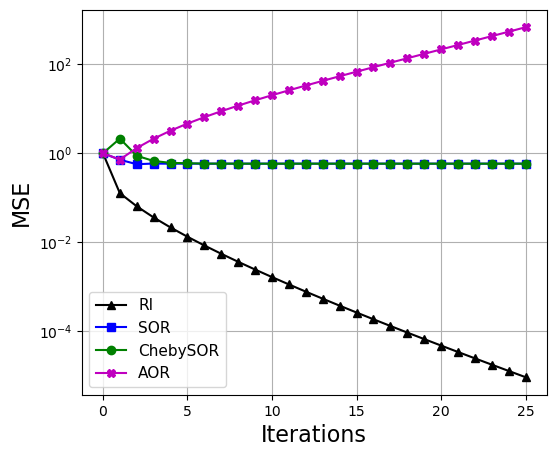

In [6]:
methods = ["RI", "SOR", "ChebySOR", "AOR"]
markers = ['^k-', 'sb-', 'og-', 'Xm-'] #, 'sr-', '^r:', '^b:', 'ok:', 'sg:', '^y:']
norms = [ri_norm, sor_norm, sorcheb_norm, aor_norm]

itr_list = np.arange(total_itr + 1)
plt.figure(figsize=(6,5))
for method, marker, norm in zip(methods, markers, norms):
    plt.semilogy(itr_list, norm, marker, label=method)
    plt.grid("True")
plt.legend(fontsize=11)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.yscale('log')
plt.show()